In [4]:
import pandas as pd
import numpy as np


In [6]:
df = pd.read_csv("courses_5000_complete_dataset2.csv")
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (5000, 9)


,Title,Platform,Category,Price,Instructor,Rating,Learners,Duration_Hours,Difficulty
0,Online Course,Coursera,#NAME?,Free / Paid,Andrew Ng,5.0,392427,47,Advanced
1,Online Course,Coursera,#NAME?,Free / Paid,University Faculty,3.6,182946,50,Advanced
2,Online Course,Coursera,#NAME?,Free / Paid,Microsoft Learn,4.0,460957,40,Advanced
3,Online Course,Coursera,#NAME?,Free / Paid,Andrew Ng,4.3,412367,27,Intermediate
4,Online Course,Coursera,#NAME?,Free / Paid,Microsoft Learn,3.8,383496,14,Intermediate


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           5000 non-null   object 
 1   Platform        5000 non-null   object 
 2   Category        5000 non-null   object 
 3   Price           5000 non-null   object 
 4   Instructor      5000 non-null   object 
 5   Rating          5000 non-null   float64
 6   Learners        5000 non-null   int64  
 7   Duration_Hours  5000 non-null   int64  
 8   Difficulty      5000 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 351.7+ KB


In [8]:
df.isnull().sum()


Title             0
Platform          0
Category          0
Price             0
Instructor        0
Rating            0
Learners          0
Duration_Hours    0
Difficulty        0
dtype: int64

In [9]:
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)


After removing duplicates: (5000, 9)


In [10]:

df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")
df["Rating"].fillna(df["Rating"].mean(), inplace=True)

df["Learners"] = pd.to_numeric(df["Learners"], errors="coerce")
df["Learners"].fillna(df["Learners"].median(), inplace=True)

df["Duration_Hours"] = pd.to_numeric(df["Duration_Hours"], errors="coerce")
df["Duration_Hours"].fillna(df["Duration_Hours"].median(), inplace=True)

df["Instructor"].fillna("Unknown Instructor", inplace=True)


/tmp/ipykernel_165/2550996253.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Rating"].fillna(df["Rating"].mean(), inplace=True)
/tmp/ipykernel_165/2550996253.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [11]:
def difficulty_level(hours):
    if hours <= 10:
        return "Beginner"
    elif hours <= 30:
        return "Intermediate"
    else:
        return "Advanced"

df["Difficulty"] = df["Duration_Hours"].apply(difficulty_level)


In [12]:
df["Price_Type"] = df["Price"].apply(lambda x: 0 if "Free" in str(x) else 1)


In [13]:
df["Instructor_Popularity"] = df.groupby("Instructor")["Learners"].transform("mean")


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_columns = ["Platform", "Category", "Instructor", "Difficulty"]

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])


In [15]:
df["Success_Score"] = (
    (df["Rating"] * 0.6) +
    (df["Learners"] / df["Learners"].max()) * 4
)


In [16]:
df["Success"] = df["Success_Score"].apply(
    lambda x: 1 if x >= df["Success_Score"].median() else 0
)


In [17]:
X = df.drop(
    ["Title", "Price", "Success", "Success_Score"],
    axis=1
)

y = df["Success"]

print("Feature Shape:", X.shape)
print("Target Shape:", y.shape)


Feature Shape: (5000, 9)
Target Shape: (5000,)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
df.to_csv("courses_5000_processed.csv", index=False)
print("✅ Processed dataset saved successfully")


✅ Processed dataset saved successfully


In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


df = pd.read_csv("courses_5000_complete_dataset2.csv")
print("Original shape:", df.shape)


df = df.drop_duplicates().copy()
print("After duplicates removed:", df.shape)


df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")
df["Learners"] = pd.to_numeric(df["Learners"], errors="coerce")
df["Duration_Hours"] = pd.to_numeric(df["Duration_Hours"], errors="coerce")


df["Rating"] = df["Rating"].fillna(df["Rating"].mean())
df["Learners"] = df["Learners"].fillna(df["Learners"].median())
df["Duration_Hours"] = df["Duration_Hours"].fillna(df["Duration_Hours"].median())
df["Instructor"] = df["Instructor"].fillna("Unknown Instructor")



def difficulty_level(hours):
    if hours <= 10:
        return "Beginner"
    elif hours <= 30:
        return "Intermediate"
    else:
        return "Advanced"

df["Difficulty"] = df["Duration_Hours"].apply(difficulty_level)


df["Price_Type"] = df["Price"].astype(str).apply(
    lambda x: 0 if "Free" in x else 1
)


df["Instructor_Popularity"] = df.groupby("Instructor")["Learners"].transform("mean")


label_encoders = {}
categorical_cols = ["Platform", "Category", "Instructor", "Difficulty"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


df["Success_Score"] = (
    (df["Rating"] * 0.6) +
    (df["Learners"] / df["Learners"].max()) * 4
)

df["Success"] = (df["Success_Score"] >= df["Success_Score"].median()).astype(int)


X = df.drop(
    ["Title", "Price", "Success", "Success_Score"],
    axis=1
)
y = df["Success"]



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


df.to_csv("courses_5000_processed.csv", index=False)
print("✅ Processed dataset saved successfully")


print("Final dataset shape:", df.shape)
print(df.head())


Original shape: (5000, 9)
After duplicates removed: (5000, 9)
✅ Processed dataset saved successfully
Final dataset shape: (5000, 13)
           Title  Platform  Category        Price  Instructor  Rating  \
0  Online Course         0         0  Free / Paid           0     5.0   
1  Online Course         0         0  Free / Paid           8     3.6   
2  Online Course         0         0  Free / Paid           7     4.0   
3  Online Course         0         0  Free / Paid           0     4.3   
4  Online Course         0         0  Free / Paid           7     3.8   

   Learners  Duration_Hours  Difficulty  Price_Type  Instructor_Popularity  \
0    392427              47           0           0          148393.643657   
1    182946              50           0           0          123908.443674   
2    460957              40           0           0          147259.490637   
3    412367              27           2           0          148393.643657   
4    383496              14           

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [26]:
df = pd.read_csv("courses_5000_complete_dataset2.csv")


In [27]:
print("Shape:", df.shape)
df.head()


Shape: (5000, 9)


,Title,Platform,Category,Price,Instructor,Rating,Learners,Duration_Hours,Difficulty
0,Online Course,Coursera,#NAME?,Free / Paid,Andrew Ng,5.0,392427,47,Advanced
1,Online Course,Coursera,#NAME?,Free / Paid,University Faculty,3.6,182946,50,Advanced
2,Online Course,Coursera,#NAME?,Free / Paid,Microsoft Learn,4.0,460957,40,Advanced
3,Online Course,Coursera,#NAME?,Free / Paid,Andrew Ng,4.3,412367,27,Intermediate
4,Online Course,Coursera,#NAME?,Free / Paid,Microsoft Learn,3.8,383496,14,Intermediate


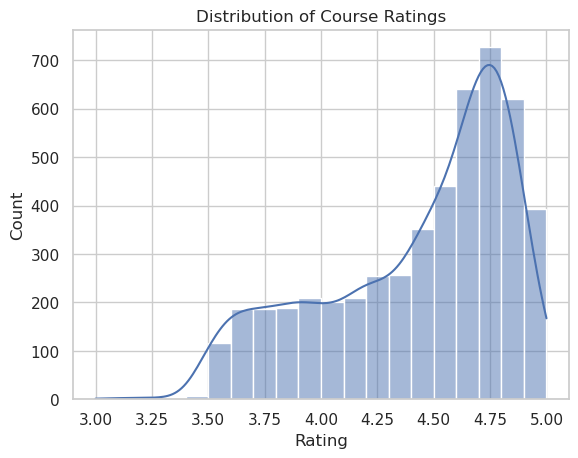

In [28]:
plt.figure()
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title("Distribution of Course Ratings")
plt.show()


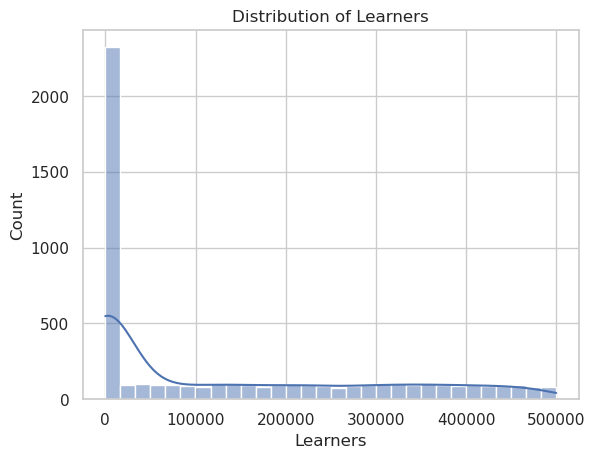

In [29]:
plt.figure()
sns.histplot(df['Learners'], bins=30, kde=True)
plt.title("Distribution of Learners")
plt.show()


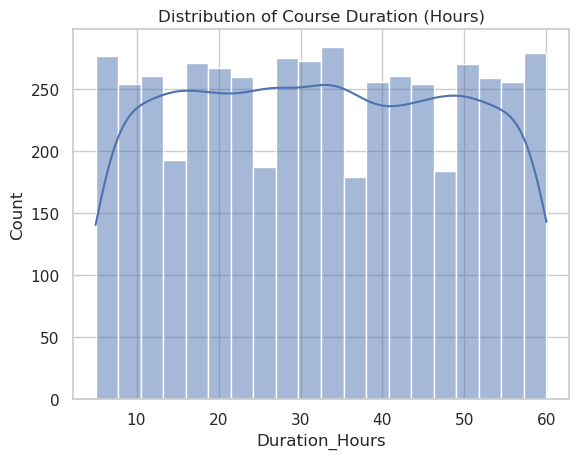

In [30]:
plt.figure()
sns.histplot(df['Duration_Hours'], bins=20, kde=True)
plt.title("Distribution of Course Duration (Hours)")
plt.show()


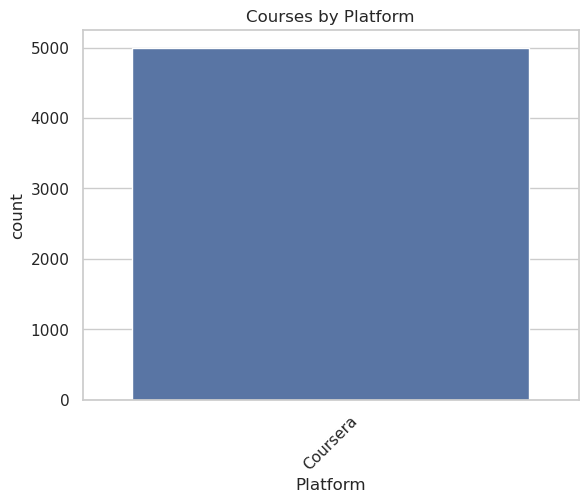

In [31]:
plt.figure()
sns.countplot(x='Platform', data=df)
plt.title("Courses by Platform")
plt.xticks(rotation=45)
plt.show()


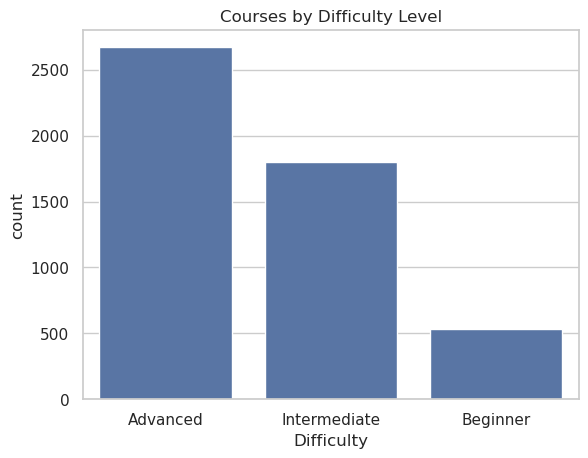

In [32]:
plt.figure()
sns.countplot(x='Difficulty', data=df)
plt.title("Courses by Difficulty Level")
plt.show()


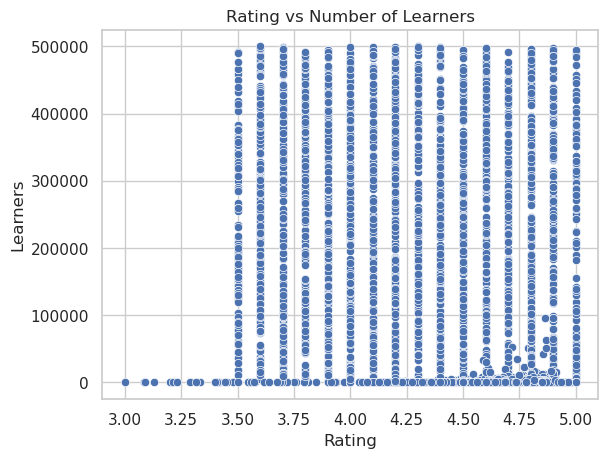

In [33]:
plt.figure()
sns.scatterplot(x='Rating', y='Learners', data=df)
plt.title("Rating vs Number of Learners")
plt.show()


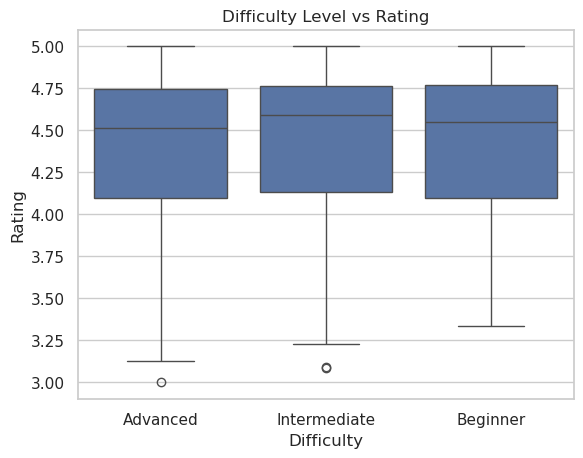

In [34]:
plt.figure()
sns.boxplot(x='Difficulty', y='Rating', data=df)
plt.title("Difficulty Level vs Rating")
plt.show()


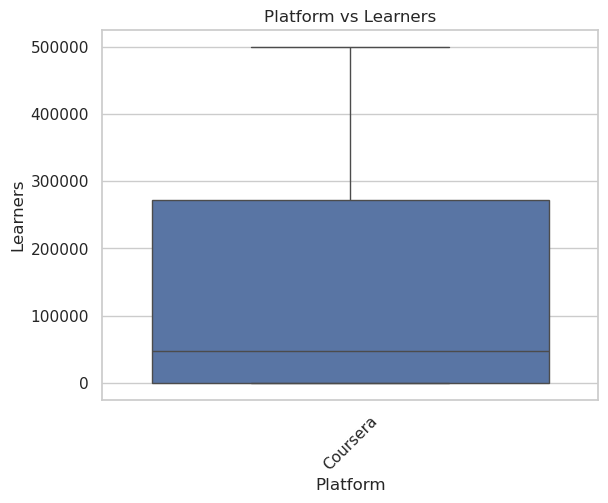

In [35]:
plt.figure()
sns.boxplot(x='Platform', y='Learners', data=df)
plt.title("Platform vs Learners")
plt.xticks(rotation=45)
plt.show()
